In [1]:
!pip install --upgrade pip
!pip install -U scikit-learn

     |████████████████████████████████| 1.5MB 3.7MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 7.9 MB/s eta 0:00:01�███████▊       | 5.3 MB 7.9 MB/s eta 0:00:01
ERROR: azureml-train-automl 1.0.72 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.23.1 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.23.1 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-le

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Code to enable display of all columns of a pandas DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Code to ignore mathematical error warnings
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
#Importing Cleaned Data
df = pd.read_csv('Free Agency Data 2016-2019.csv')
df.head()

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Center,Forward,Guard,All Star,Total All Star,MVP,Rookie of Year,DPOY,6th man of Year,Most Improved,Finals MVP,Total MVP,Total Rookie of Year,Total DPOY,Total 6th man of Year,Total Most Improved,Total Finals MVP,All NBA 1st Team,All NBA 2nd Team,All NBA 3rd Team,Total All NBA 1st Team,Total All NBA 2nd Team,Total All NBA 3rd Team,All Rookie 1st Team,All Rookie 2nd Team,Total All Rookie 1st Team,Total All Rookie 2nd Team,All Defensive 1st Team,All Defensive 2nd Team,Total All Defensive 1st Team,Total All Defensive 2nd Team,Pick,Draft Year,YOS,New Team,Salary,Salary Cap,% of Cap
0,Ty Lawson,28.0,IND,66.0,13.0,21.4,2.1,5.4,0.393,0.5,1.6,0.333,1.6,3.7,0.419,0.444,0.9,1.3,0.686,0.4,1.4,1.8,3.6,0.8,0.1,1.4,1.3,5.7,2016,9.7,0.476,0.305,0.243,2.0,7.4,4.7,24.6,1.9,0.4,19.5,14.9,0.2,0.7,0.9,0.031,-2.4,-1.2,-3.6,-0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,2009.0,7.0,SAC,1315448,94143000.0,1.4
1,Christian Wood,20.0,PHI,17.0,0.0,8.5,1.3,3.1,0.415,0.2,0.6,0.364,1.1,2.5,0.429,0.453,0.8,1.2,0.619,0.8,1.5,2.2,0.2,0.3,0.4,0.1,0.6,3.6,2016,16.4,0.490,0.208,0.396,9.4,19.4,14.3,3.5,1.7,3.7,3.1,19.4,0.2,0.1,0.3,0.097,0.4,-0.6,-0.2,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,CHA,874636,94143000.0,0.9
2,Dion Waiters,24.0,OKC,78.0,15.0,27.6,3.6,9.1,0.399,1.1,3.1,0.358,2.5,6.0,0.421,0.460,1.4,2.0,0.713,0.5,2.1,2.6,2.0,1.0,0.2,1.5,1.8,9.8,2016,9.4,0.492,0.340,0.222,1.9,8.0,5.1,10.0,1.9,0.5,13.4,17.7,0.3,1.8,2.1,0.046,-2.4,-0.4,-2.8,-0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2012.0,4.0,MIA,2898000,94143000.0,3.1
3,Dwyane Wade,34.0,MIA,74.0,73.0,30.5,7.3,16.0,0.456,0.1,0.6,0.159,7.2,15.4,0.468,0.459,4.4,5.5,0.793,1.1,3.0,4.1,4.6,1.1,0.6,2.7,1.6,19.0,2016,20.3,0.517,0.037,0.343,4.3,10.7,7.6,27.4,1.8,1.4,13.0,31.6,2.4,2.6,4.9,0.105,2.3,-0.4,1.9,2.2,0.0,0.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2003.0,13.0,CHI,23200000,94143000.0,24.6
4,Sasha Vujacic,31.0,NYK,61.0,25.0,14.9,1.7,4.5,0.383,0.9,2.3,0.364,0.9,2.2,0.403,0.477,0.5,0.6,0.821,0.4,2.0,2.4,1.4,0.6,0.1,0.7,1.4,4.9,2016,11.1,0.503,0.516,0.141,3.2,14.6,9.0,14.3,1.9,0.4,13.0,16.8,0.3,0.8,1.1,0.060,-1.5,0.3,-1.2,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2004.0,12.0,NYK,1410598,94143000.0,1.5


In [4]:
df.shape

(499, 87)

# Descriptive Statistics

In [5]:
#Seperate player with respect to number of years in league
juniors = df.loc[df['YOS'] <= 6, :].copy()
seniors = df.loc[(df['YOS'] > 6) & (df['YOS'] < 10), :].copy()
veterans = df.loc[df['YOS'] >= 10, :].copy()
undrafted = df.loc[df['YOS'].isnull(), :].copy()

In [6]:
juniors.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Center,Forward,Guard,All Star,Total All Star,MVP,Rookie of Year,DPOY,6th man of Year,Most Improved,Finals MVP,Total MVP,Total Rookie of Year,Total DPOY,Total 6th man of Year,Total Most Improved,Total Finals MVP,All NBA 1st Team,All NBA 2nd Team,All NBA 3rd Team,Total All NBA 1st Team,Total All NBA 2nd Team,Total All NBA 3rd Team,All Rookie 1st Team,All Rookie 2nd Team,Total All Rookie 1st Team,Total All Rookie 2nd Team,All Defensive 1st Team,All Defensive 2nd Team,Total All Defensive 1st Team,Total All Defensive 2nd Team,Pick,Draft Year,YOS,Salary,Salary Cap,% of Cap
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.00000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.0,148.0,148.0,148.0,148.0,148.0,148.0,148.000000,148.0,148.0,148.0,148.0,148.0,148.0,148.000000,148.0,148.0,148.000000,148.0,148.0,148.000000,148.000000,148.0,148.000000,148.0,148.000000,148.000000,148.000000,148.000000,1.480000e+02,1.480000e+02,148.000000
mean,24.168919,56.743243,21.439189,19.489189,3.106757,6.720946,0.458520,0.716892,2.064189,0.279284,2.396622,4.653378,0.504986,0.509236,1.264865,1.748649,0.717784,0.935811,2.902703,3.839189,1.661486,0.634459,0.429054,1.04527,1.727703,8.195946,2017.628378,14.055405,0.538689,0.303622,0.268216,5.531081,16.310811,10.902027,12.593919,1.596622,1.856757,12.192568,18.445270,1.268243,1.286486,2.550000,0.092703,-0.935135,0.022973,-0.910811,0.515541,0.229730,0.391892,0.378378,0.013514,0.013514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.0,0.0,0.006757,0.0,0.0,0.006757,0.0,0.0,0.128378,0.101351,0.0,0.013514,0.0,0.013514,23.027027,2013.533784,4.094595,6.770954e+06,1.016920e+08,6.764865
std,1.893018,22.306499,25.129657,7.753026,1.673103,3.528412,0.087181,0.658114,1.740084,0.149209,1.433582,2.694373,0.091823,0.083959,0.799393,1.169946,0.153003,0.748241,1.707484,2.361011,1.360448,0.345764,0.448012,0.62470,0.679217,4.394630,1.185401,4.332872,0.078354,0.201464,0.157625,3.875334,6.592793,4.823969,8.014003,0.706858,1.759258,3.831504,4.203179,1.539946,1.028813,2.275797,0.062132,2.191041,1.229684,2.562634,0.890976,0.422087,0.489830,0.486629,0.115852,0.115852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162713,0.0,0.0,0.0,0.0,0.0,0.0,0.082199,0.0,0.0,0.082199,0.0,0.0,0.335647,0.302818,0.0,0.115852,0.0,0.115852,15.459821,1.700002,1.150793,6.621622e+06,5.828053e+06,6.690748
min,21.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.100000,0.000000,-0.300000,-0.033000,-7.700000,-2.900000,-10.400000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,2010.000000,1.000000,5.000000e+04,9.414300e+07,0.000000
25%,23.000000,45.750000,2.000000,13.775000,1.900000,4.200000,0.412750,0.200000,0.700000,0.231000,1.300000,2.800000,0.467000,0.480250,0.700000,1.000000,0.662500,0.400000,1.800000,2.275000,0.800000,0.400000,0.200000,0.60000,1.300000,4.900000,2016.000000,10.975000,0.509000,0.136000,0.188000,2.075000,10.900000,6.500000,6.900000,1.100000,0.50

In [7]:
seniors.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Center,Forward,Guard,All Star,Total All Star,MVP,Rookie of Year,DPOY,6th man of Year,Most Improved,Finals MVP,Total MVP,Total Rookie of Year,Total DPOY,Total 6th man of Year,Total Most Improved,Total Finals MVP,All NBA 1st Team,All NBA 2nd Team,All NBA 3rd Team,Total All NBA 1st Team,Total All NBA 2nd Team,Total All NBA 3rd Team,All Rookie 1st Team,All Rookie 2nd Team,Total All Rookie 1st Team,Total All Rookie 2nd Team,All Defensive 1st Team,All Defensive 2nd Team,Total All Defensive 1st Team,Total All Defensive 2nd Team,Pick,Draft Year,YOS,Salary,Salary Cap,% of Cap
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.0,98.0,98.0,98.0,98.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.000000,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.0,98.000000,98.000000,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01,9.800000e+01,98.000000
mean,28.030612,66.551020,36.489796,24.886735,4.341837,9.516327,0.454469,1.196939,3.229592,0.328531,3.144898,6.289796,0.492296,0.516806,1.946939,2.436735,0.765847,0.915306,3.466327,4.383673,2.482653,0.762245,0.439796,1.395918,1.895918,11.824490,2017.479592,15.172449,0.550571,0.337704,0.243918,4.401020,15.530612,9.998980,14.776531,1.492857,1.538776,11.67449,20.397959,2.236735,1.702041,3.937755,0.103429,0.233673,-0.113265,0.118367,1.133673,0.193878,0.387755,0.418367,0.132653,0.734694,0.0,0.0,0.0,0.0,0.0,0.010204,0.040816,0.061224,0.030612,0.0,0.040816,0.020408,0.0,0.040816,0.020408,0.112245,0.142857,0.122449,0.0,0.0,0.173469,0.102041,0.0,0.020408,0.102041,0.142857,19.775510,2009.418367,8.061224,1.150930e+07,1.011334e+08,11.335714
std,1.335125,15.411284,29.729448,7.431275,2.201214,4.597594,0.055784,0.861724,2.190288,0.111702,1.834499,3.469647,0.058869,0.048130,1.569832,1.834345,0.106386,0.722161,1.782732,2.332809,1.780654,0.384631,0.364887,0.804103,0.598438,6.284001,1.194744,4.928055,0.048482,0.192919,0.107194,3.613391,6.528390,4.791799,8.746602,0.485512,1.326544,3.39558,5.774098,2.179444,1.020509,2.936599,0.058221,2.519816,1.119521,2.959777,1.611425,0.397367,0.489743,0.495827,0.340943,1.570022,0.0,0.0,0.0,0.0,0.0,0.101015,0.245301,0.240974,0.224944,0.0,0.198882,0.202031,0.0,0.198882,0.142119,0.589997,0.497416,0.522983,0.0,0.0,0.380599,0.304258,0.0,0.142119,0.465064,0.537271,14.293341,1.477833,0.729586,1.018845e+07,5.864817e+06,9.904890
min,25.000000,12.000000,0.000000,2.300000,0.200000,0.700000,0.333000,0.000000,0.000000,0.000000,0.200000,0.700000,0.333000,0.333000,0.100000,0.200000,0.333000,0.100000,0.600000,0.700000,0.100000,0.100000,0.000000,0.000000,0.500000,0.600000,2016.000000,6.000000,0.340000,0.000000,0.053000,0.700000,4.800000,3.700000,3.100000,0.500000,0.000000,5.40000,9.400000,-1.400000,0.100000,-0.300000,-0.077000,-6.800000,-3.900000,-7.500000,-1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2007.000000,7.000000,1.196010e+05,9.414300e+07,0.100000
25%,27.000000,60.250000,7.250000,19.825000,2.625000,6.000000,0.420250,0.600000,1.725000,0.326000,1.700000,3.425000,0.454750,0.488250,0.725000,1.125000,0.715500,0.400000,2.100000,2.525000,1.025000,0.500000,0.200000,0.825000,1.500000,6.825000,

In [8]:
veterans.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Center,Forward,Guard,All Star,Total All Star,MVP,Rookie of Year,DPOY,6th man of Year,Most Improved,Finals MVP,Total MVP,Total Rookie of Year,Total DPOY,Total 6th man of Year,Total Most Improved,Total Finals MVP,All NBA 1st Team,All NBA 2nd Team,All NBA 3rd Team,Total All NBA 1st Team,Total All NBA 2nd Team,Total All NBA 3rd Team,All Rookie 1st Team,All Rookie 2nd Team,Total All Rookie 1st Team,Total All Rookie 2nd Team,All Defensive 1st Team,All Defensive 2nd Team,Total All Defensive 1st Team,Total All Defensive 2nd Team,Pick,Draft Year,YOS,Salary,Salary Cap,% of Cap
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0,122.0,122.0,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.0,122.0,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02,1.220000e+02,122.000000
mean,32.565574,63.762295,33.688525,23.286885,3.765574,8.113934,0.464041,0.961475,2.651639,0.301918,2.806557,5.464754,0.504861,0.524475,1.622131,2.107377,0.755074,0.951639,3.504098,4.447541,2.373770,0.736885,0.496721,1.312295,1.900820,10.118033,2017.418033,14.677869,0.556352,0.332631,0.253115,4.532787,16.097541,10.354918,14.603279,1.545082,1.741803,13.022951,18.852459,1.922131,1.719672,3.636885,0.105566,-0.140984,0.243443,0.099180,1.023770,0.213115,0.426230,0.360656,0.073770,2.360656,0.0,0.0,0.0,0.008197,0.0,0.024590,0.131148,0.122951,0.090164,0.098361,0.024590,0.147541,0.024590,0.016393,0.0,0.639344,0.442623,0.467213,0.0,0.0,0.344262,0.106557,0.0,0.008197,0.393443,0.303279,18.827869,2004.467213,12.950820,8.829203e+06,1.006983e+08,8.770492
std,2.911896,16.715932,29.899579,7.218662,1.960973,3.921636,0.069190,0.775710,2.017823,0.135415,1.822120,3.330498,0.070957,0.056091,1.255501,1.631263,0.143484,0.830835,2.048922,2.707053,2.047244,0.371105,0.451798,0.773804,0.628457,5.354183,1.141553,4.522625,0.051182,0.235119,0.146506,3.618123,7.020142,4.950100,9.394837,0.619664,1.421258,4.873300,5.051899,2.099253,1.052949,2.854551,0.056253,2.275299,1.255598,2.719945,1.504926,0.411197,0.496567,0.482171,0.262475,3.829131,0.0,0.0,0.0,0.090536,0.0,0.155511,0.559676,0.329735,0.481116,0.434272,0.155511,0.508963,0.155511,0.127507,0.0,1.911538,1.068321,0.873716,0.0,0.0,0.477086,0.309822,0.0,0.090536,1.175208,0.641400,16.008104,2.906773,2.621754,8.626322e+06,5.519544e+06,8.613258
min,28.000000,1.000000,0.000000,4.400000,0.500000,1.200000,0.304000,0.000000,0.000000,0.000000,0.100000,0.200000,0.300000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.300000,2016.000000,4.600000,0.414000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,8.500000,-0.400000,0.000000,-0.200000,-0.035000,-5.300000,-3.300000,-6.400000,-0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1998.000000,10.000000,9.804310e+05,9.414300e+07,1.000000
25%,30.000000,57.250000,5.000000,17.925000,2.300000,5.325000,0.410500,0.300000,1.000000,0.305250,1.250000,2.800000

In [9]:
undrafted.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Center,Forward,Guard,All Star,Total All Star,MVP,Rookie of Year,DPOY,6th man of Year,Most Improved,Finals MVP,Total MVP,Total Rookie of Year,Total DPOY,Total 6th man of Year,Total Most Improved,Total Finals MVP,All NBA 1st Team,All NBA 2nd Team,All NBA 3rd Team,Total All NBA 1st Team,Total All NBA 2nd Team,Total All NBA 3rd Team,All Rookie 1st Team,All Rookie 2nd Team,Total All Rookie 1st Team,Total All Rookie 2nd Team,All Defensive 1st Team,All Defensive 2nd Team,Total All Defensive 1st Team,Total All Defensive 2nd Team,Pick,Draft Year,YOS,Salary,Salary Cap,% of Cap
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.000000,131.0,131.0,131.0,131.0,0.0,0.0,0.0,1.310000e+02,1.310000e+02,131.000000
mean,27.015267,50.030534,13.198473,16.830534,2.303817,5.167939,0.438679,0.734351,2.050382,0.289626,1.570229,3.120611,0.491588,0.502145,0.908397,1.223664,0.710313,0.652672,2.129771,2.768702,1.380153,0.533588,0.276336,0.781679,1.558779,6.244275,2017.603053,11.925954,0.530015,0.371275,0.239985,4.564885,14.109924,9.314504,11.793893,1.510687,1.398473,12.152672,16.490840,0.900763,0.912214,1.818321,0.077031,-1.800763,-0.216794,-2.022137,0.222901,0.175573,0.312977,0.511450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053435,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.993790e+06,1.016949e+08,3.980153
std,4.163920,25.716184,20.234555,7.146240,1.287956,2.818190,0.087724,0.694458,1.721644,0.144701,0.956089,1.813357,0.104055,0.089321,0.688928,0.874056,0.195065,0.531663,1.158361,1.562793,1.125469,0.324775,0.265397,0.451459,0.706331,3.650862,1.187625,4.311052,0.091945,0.225063,0.142469,3.942645,6.389798,4.729386,8.368639,0.723905,1.416441,5.367070,3.921449,1.044215,0.789842,1.608430,0.067275,2.362316,1.342223,2.942926,0.494674,0.381917,0.465485,0.501788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225763,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.208185e+06,5.858993e+06,4.257490
min,20.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.200000,-0.239000,-10.400000,-6.000000,-14.600000,-0.700000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.500000e+04,9.414300e+07,0.000000
25%,24.000000,25.000000,0.000000,12.000000,1.400000,3.200000,0.401500,0.150000,0.600000,0.250000,0.900000,1.850000,0.450500,0.468500,0.400000,0.650000,0.667000,0.300000,1.300000,1.600000,0.600000,0.300000,0.100000,0.500000,1.000000,3.600000,2016.500000,9.500000,0.502000,0.220500,0.137000,1.900000,9.650000,6.150000,6.250000,1.100000,0.400000,8.900000,13.650000,0.100000,0.200000,0.300000,0.053000,-2.800000,-0.850000,-3.050000,-0.100000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

In [10]:
#Outlier check
print('Outlier in Junior: ', juniors.loc[juniors['% of Cap'] > 25, ['Year', 'Player']].values)
print('Outlier in Senior: ', seniors.loc[seniors['% of Cap'] > 30, ['Year', 'Player']].values)
print('Outlier in Veteran: ', veterans.loc[veterans['% of Cap'] > 35, ['Year', 'Player']].values)

Outlier in Junior:  []
Outlier in Senior:  [[2017 'Stephen Curry']]
Outlier in Veteran:  []


In [11]:
#Drop Outlier Entry
df.drop(df[(df['Player'] == 'Stephen Curry') & (df['Year'] == 2017)].index, inplace = True)
df.reset_index(drop = True, inplace = True)

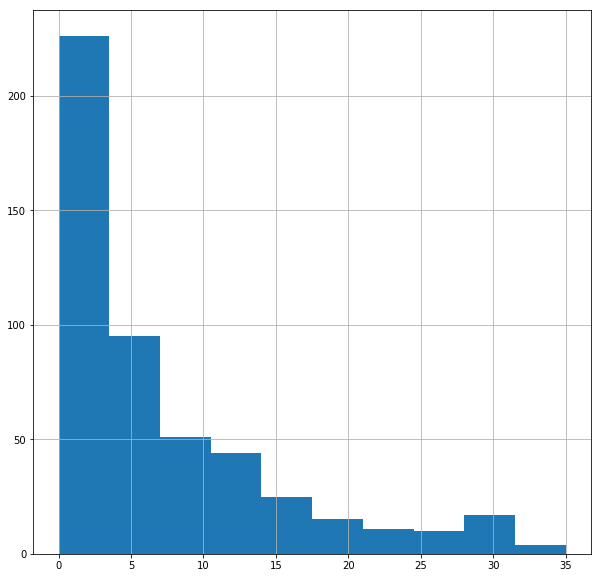

In [12]:
#Histogram Distribution of '% of Cap'
f, ax = plt.subplots(figsize = (10, 10))
df['% of Cap'].hist()
plt.show()

In [13]:
#Check for total discrete features
df[['Total All Star', 'Total MVP', 'Total Rookie of Year', 'Total DPOY', 'Total 6th man of Year', 'Total Most Improved', 'Total Finals MVP', 
    'Total All NBA 1st Team', 'Total All NBA 2nd Team', 'Total All NBA 3rd Team', 'Total All Defensive 1st Team', 'Total All Defensive 2nd Team', 'Total All Rookie 1st Team',
    'Total All Rookie 2nd Team']].sum()

Total All Star                  358.0
Total MVP                        18.0
Total Rookie of Year             25.0
Total DPOY                       14.0
Total 6th man of Year            12.0
Total Most Improved               7.0
Total Finals MVP                 20.0
Total All NBA 1st Team           87.0
Total All NBA 2nd Team           66.0
Total All NBA 3rd Team           70.0
Total All Defensive 1st Team     58.0
Total All Defensive 2nd Team     53.0
Total All Rookie 1st Team        77.0
Total All Rookie 2nd Team        45.0
dtype: float64

In [14]:
#Check for empty discrete features
df[['All Star', 'MVP', 'Rookie of Year', 'DPOY', '6th man of Year', 'Most Improved', 'Finals MVP',
    'All NBA 1st Team', 'All NBA 2nd Team', 'All NBA 3rd Team', 
    'All Defensive 1st Team', 'All Defensive 2nd Team', 'All Rookie 1st Team', 
    'All Rookie 2nd Team']].sum()

All Star                  23.0
MVP                        0.0
Rookie of Year             0.0
DPOY                       0.0
6th man of Year            1.0
Most Improved              0.0
Finals MVP                 4.0
All NBA 1st Team           3.0
All NBA 2nd Team           5.0
All NBA 3rd Team           3.0
All Defensive 1st Team     0.0
All Defensive 2nd Team     5.0
All Rookie 1st Team        0.0
All Rookie 2nd Team        0.0
dtype: float64

In [15]:
#Dropping empty variables
df.drop(['MVP', 'Rookie of Year', 'DPOY', 'Most Improved', 'All Defensive 1st Team', 'All Rookie 1st Team', 'All Rookie 2nd Team'], axis = 1, inplace = True)

In [16]:
#Storing Undrafted Picks as an outlier
df.fillna(999, inplace = True)

# Feature Selection

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = df.drop(['Year', 'Player', 'Tm', 'New Team', 'Salary', 'Salary Cap', '% of Cap'], axis = 1).fillna(9999)
y = df['% of Cap']

linear_model = LinearRegression()
cv = cross_validate(linear_model, X, y, cv = KFold(10, shuffle = True, random_state = 0), scoring = ['r2', 'neg_root_mean_squared_error'], 
                           return_estimator = True, return_train_score = True)
print('Mean Rsquared: ', np.mean(cv['test_r2']))
print('STD Rsquared: ', np.std(cv['test_r2']))
print('Mean Root Mean Square Error: ', np.mean(abs(cv['test_neg_root_mean_squared_error'])))
print('STD Root Mean Square Error: ', np.std(abs(cv['test_neg_root_mean_squared_error'])))

Mean Rsquared:  0.6610975005359344
STD Rsquared:  0.11446292687810108
Mean Root Mean Square Error:  4.3786749949537604
STD Root Mean Square Error:  0.6465462565077207


In [18]:
#Backward Elimination
import statsmodels.regression.linear_model as sm
def Backward_Elimination(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size = 0.2)
    regressor = sm.OLS(y_train, X_train).fit()
    while regressor.pvalues.max() > 0.05:
        insignificant = regressor.pvalues.idxmax()
        X_train.drop(insignificant, axis = 1, inplace = True)
        regressor = sm.OLS(y_train, X_train).fit()
        
    return(X_train.columns.tolist())

In [19]:
sign_feat = []
for i in range(0,50):
    sign_feat += Backward_Elimination(X, y)
    
values, counts = np.unique(sign_feat, return_counts = True)
Features = pd.Series(counts, index = values)
Features[Features > 25]

Mean Rsquared:  0.7271563191777138
STD Rsquared:  0.10498105116611701
Mean Root Mean Square Error:  3.8928569332168634
STD Root Mean Square Error:  0.5507198116930196


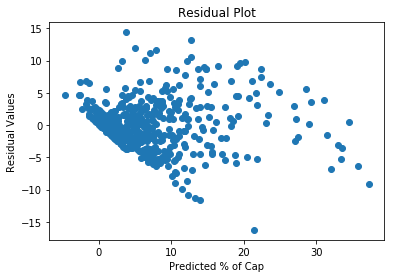

In [20]:
#Regression model after feature selection
X = df[Features[Features > 25]]
y = df['% of Cap']

linear_model = LinearRegression()
cv = cross_validate(linear_model, X, y, cv = KFold(10, shuffle = True, random_state = 0), scoring = ['r2', 'neg_root_mean_squared_error'], 
                    return_estimator = True, return_train_score = True)
print('Mean Rsquared: ', np.mean(cv['test_r2']))
print('STD Rsquared: ', np.std(cv['test_r2']))
print('Mean Root Mean Square Error: ', np.mean(abs(cv['test_neg_root_mean_squared_error'])))
print('STD Root Mean Square Error: ', np.std(abs(cv['test_neg_root_mean_squared_error'])))

predict = cross_val_predict(linear_model, X, y, cv = KFold(10, shuffle = True, random_state = 0))
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predicted % of Cap')
plt.ylabel('Residual Values')
plt.title('Residual Plot')
plt.show()

df['Predicted % of Cap'] = predict
df['Residuals'] = residuals

In [21]:
#Describing Co-efficients
coef = []
for i, model in enumerate(cv['estimator']):
    coef += [model.coef_.tolist()]
coef = pd.DataFrame(data = coef, columns = X.columns.tolist())
coef.describe()

,Age,All NBA 2nd Team,All Star,Center,DWS,Draft Year,FGA,Forward,G,Guard,ORB,OWS,TOV,TOV%,Total 6th man of Year,Total All Defensive 2nd Team,Total All NBA 1st Team,Total MVP,YOS
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.171755,-7.682664,3.010758,0.264505,2.366088,-0.916518,1.128482,0.398204,-0.059223,-0.662710,-1.680993,1.918119,-2.418096,0.272693,1.864458,2.028752,1.329662,-5.736262,-0.934781
std,0.014177,1.118670,0.387897,0.182530,0.135224,0.055157,0.058905,0.052117,0.004051,0.179418,0.255076,0.073715,0.502328,0.026842,0.351887,0.216896,0.132617,0.437391,0.056259
min,-0.198835,-10.477204,2.524232,0.025001,2.199527,-1.026225,1.010064,0.323558,-0.064470,-1.026967,-2.013430,1.815658,-2.928683,0.208397,1.152690,1.636795,1.158927,-6.554570,-1.046646
25%,-0.175273,-7.777082,2.707273,0.150077,2.264270,-0.935635,1.112303,0.365497,-0.061005,-0.736000,-1.838598,1.887665,-2.714093,0.264406,1.798753,1.926141,1.203989,-5.995327,-0.954210
50%,-0.173274,-7.559696,3.043340,0.274102,2.351808,-0.920439,1.128793,0.387913,-0.059920,-0.679320,-1.711410,1.905723,-2.493164,0.279379,1.844191,2.044886,1.334359,-5.625129,-0.938788
75%,-0.165100,-7.060434,3.201817,0.328813,2.438082,-0.885370,1.173196,0.433182,-0.058282,-0.565152,-1.512322,1.934383,-2.368108,0.289827,1.919794,2.125977,1.439463,-5.475498,-0.903047
max,-0.149295,-6.330902,3.806244,0.662004,2.636210,-0.815566,1.198495,0.491483,-0.049437,-0.392098,-1.209799,2.076153,-1.146269,0.298351,2.614054,2.413961,1.522269,-5.208293,-0.831707


In [22]:
stats = df
stats.loc[stats['Guard'] == 1, 'Pos'] = 'Guard'
stats.loc[stats['Forward'] == 1, 'Pos'] = 'Forward'
stats.loc[stats['Center'] == 1, 'Pos'] = 'Center'
stats = stats[['Year', 'Player', 'Pos', 'Age', 'New Team', 'PTS', '% of Cap', 'Predicted % of Cap', 'Residuals', 'YOS']]
stats = stats.sort_values('Residuals', ascending = False)

In [23]:
#Outlier check
stats.loc[(stats['YOS'] <= 6) & (stats['Predicted % of Cap'] > 25), 'Predicted % of Cap'] = 25
stats.loc[(stats['YOS'] > 6) & (stats['YOS'] < 10) & (stats['Predicted % of Cap'] > 30), 'Predicted % of Cap'] = 30
stats.loc[(stats['YOS'] >= 10) & (stats['Predicted % of Cap'] > 35), 'Predicted % of Cap'] = 35
stats.loc[stats['Predicted % of Cap'] < 0, 'Predicted % of Cap'] = 0
stats['Residuals'] = stats['% of Cap'] - stats['Predicted % of Cap']

In [24]:
stats['Residuals'].describe()

count    498.000000
mean      -0.047578
std        3.851603
min      -16.240580
25%       -2.173271
50%       -0.232253
75%        1.896467
max       14.371508
Name: Residuals, dtype: float64

Mean Rsquared:  0.710809534902587
STD Rsquared:  0.10441621921448127
Mean Root Mean Square Error:  4.010605927443335
STD Root Mean Square Error:  0.5202398816376971


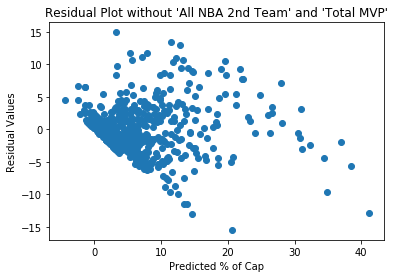

,Year,Player,Predicted % of Cap,Predicted % of Cap after dropping features,Difference
2,2016,LeBron James,29.259049,38.514156,9.255108
10,2019,Kyrie Irving,19.491124,28.142043,8.650919
8,2018,LeBron James,31.134678,36.976938,5.842259
7,2018,Derrick Rose,-2.541105,2.192428,4.733533
3,2017,Derrick Rose,8.478424,12.554604,4.076181
12,2019,Derrick Rose,6.985152,10.985904,4.000751
1,2016,Kevin Durant,37.287178,41.138898,3.851720
13,2019,Kawhi Leonard,31.529419,34.484847,2.955428
5,2017,Kevin Durant,32.005541,34.892090,2.886549
11,2019,Kevin Durant,28.547112,31.001149,2.454038


In [60]:
#Exploting why 'All NBA 2nd Team' and 'Total MVP' have negative co-efficients
X1 = df[Features[Features > 25]]
y1 = df['% of Cap']

linear_model = LinearRegression()
cv = cross_validate(linear_model, X1, y1, cv = KFold(10, shuffle = True, random_state = 0), scoring = ['r2', 'neg_root_mean_squared_error'], 
                    return_estimator = True, return_train_score = True)
print('Mean Rsquared: ', np.mean(cv['test_r2']))
print('STD Rsquared: ', np.std(cv['test_r2']))
print('Mean Root Mean Square Error: ', np.mean(abs(cv['test_neg_root_mean_squared_error'])))
print('STD Root Mean Square Error: ', np.std(abs(cv['test_neg_root_mean_squared_error'])))

predict1 = cross_val_predict(linear_model, X1, y1, cv = KFold(10, shuffle = True, random_state = 0))
residuals1 = y1 - predict1
plt.scatter(predict1, residuals1)
plt.xlabel('Predicted % of Cap')
plt.ylabel('Residual Values')
plt.title("Residual Plot without 'All NBA 2nd Team' and 'Total MVP'")
plt.show()

df1 = df.copy()
df1['Predicted % of Cap after dropping features'] = predict1
df1['Residuals1'] = residuals1

comparing = df[(df['All NBA 2nd Team'] > 0) | (df['Total MVP'] > 0)][['Year', 'Player', 'Predicted % of Cap']].merge(df1[(df1['All NBA 2nd Team'] > 0) | (df1['Total MVP'] > 0)][['Year', 'Player', 'Predicted % of Cap after dropping features']])
comparing['Difference'] = comparing['Predicted % of Cap after dropping features'] - comparing['Predicted % of Cap']
comparing.sort_values('Difference', ascending = False)

# Overpaid Players

In [26]:
#Categorizing Overpaid Players
stats.loc[stats['Residuals'] >= 2.5, 'Pay Status'] = 'Overpaid'

In [27]:
stats[stats['Pay Status'] == 'Overpaid'].sort_values('Residuals', ascending = False)[:10].reset_index(drop = True)

,Year,Player,Pos,Age,New Team,PTS,% of Cap,Predicted % of Cap,Residuals,YOS,Pay Status
0,2016,Joakim Noah,Center,30.0,NYK,4.3,18.1,3.728492,14.371508,9.0,Overpaid
1,2017,Jrue Holiday,Guard,26.0,NOP,15.4,25.9,12.730448,13.169552,8.0,Overpaid
2,2016,Timofey Mozgov,Center,29.0,LAL,6.3,17.0,5.055423,11.944577,999.0,Overpaid
3,2018,Jabari Parker,Forward,22.0,CHI,12.6,19.6,7.932031,11.667969,4.0,Overpaid
4,2019,Terry Rozier,Guard,24.0,CHO,9.0,18.2,7.014827,11.185173,4.0,Overpaid
5,2017,JJ Redick,Guard,32.0,PHI,15.0,23.2,12.673132,10.526868,999.0,Overpaid
6,2018,Luol Deng,Forward,32.0,MIN,2.0,16.4,6.328712,10.071288,14.0,Overpaid
7,2016,Miles Plumlee,Center,27.0,MIL,5.1,13.2,3.248891,9.951109,4.0,Overpaid
8,2019,Harrison Barnes,Forward,26.0,SAC,16.4,22.1,12.217600,9.882400,7.0,Overpaid
9,2019,Tobias Harris,Forward,26.0,PHI,20.0,30.0,20.244671,9.755329,8.0,Overpaid


In [28]:
stats[(stats['Pay Status'] == 'Overpaid')].sort_values('% of Cap', ascending = False)[:10].reset_index(drop = True)

,Year,Player,Pos,Age,New Team,PTS,% of Cap,Predicted % of Cap,Residuals,YOS,Pay Status
0,2018,LeBron James,Forward,33.0,LAL,27.5,35.0,31.134678,3.865322,15.0,Overpaid
1,2019,Kevin Durant,Forward,30.0,BRK,26.0,34.1,28.547112,5.552888,12.0,Overpaid
2,2016,LeBron James,Forward,31.0,CLE,25.3,32.9,29.259049,3.640951,13.0,Overpaid
3,2017,Paul Millsap,Forward,31.0,DEN,18.1,31.1,22.455684,8.644316,11.0,Overpaid
4,2019,Kemba Walker,Guard,28.0,BOS,25.6,30.0,26.976424,3.023576,8.0,Overpaid
5,2019,Klay Thompson,Guard,28.0,GSW,21.5,30.0,23.643325,6.356675,8.0,Overpaid
6,2019,Jimmy Butler,Guard,29.0,MIA,18.7,30.0,24.909056,5.090944,8.0,Overpaid
7,2019,Tobias Harris,Forward,26.0,PHI,20.0,30.0,20.244671,9.755329,8.0,Overpaid
8,2017,Blake Griffin,Forward,27.0,LAC,21.6,29.8,22.418064,7.381936,8.0,Overpaid
9,2019,Kyrie Irving,Guard,26.0,BRK,23.8,29.1,19.491124,9.608876,8.0,Overpaid


In [29]:
#Categorizing Underpaid Players
stats.loc[stats['Residuals'] <= -2.5, 'Pay Status'] = 'Underpaid'

In [30]:
stats[stats['Pay Status'] == 'Underpaid'].sort_values('Residuals')[:10].reset_index(drop = True)

,Year,Player,Pos,Age,New Team,PTS,% of Cap,Predicted % of Cap,Residuals,YOS,Pay Status
0,2018,DeMarcus Cousins,Center,27.0,GSW,25.2,5.2,21.440580,-16.240580,8.0,Underpaid
1,2018,Carmelo Anthony,Forward,33.0,HOU,16.2,2.3,13.916781,-11.616781,15.0,Underpaid
2,2019,Willie Cauley-Stein,Center,25.0,GSW,11.9,2.0,13.291558,-11.291558,4.0,Underpaid
3,2017,Tony Allen,Guard,35.0,NOP,9.1,1.5,12.303552,-10.803552,13.0,Underpaid
4,2019,JaKarr Sampson,Forward,25.0,IND,20.0,1.6,11.474190,-9.874190,999.0,Underpaid
5,2016,David West,Forward,35.0,GSW,7.1,1.6,10.537822,-8.937822,13.0,Underpaid
6,2018,Rodney Hood,Guard,25.0,CLE,14.7,3.4,12.133673,-8.733673,4.0,Underpaid
7,2018,Dwyane Wade,Guard,36.0,MIA,11.4,2.3,10.120521,-7.820521,15.0,Underpaid
8,2018,Brook Lopez,Center,29.0,MIL,13.0,3.3,10.678167,-7.378167,10.0,Underpaid
9,2019,DeMarcus Cousins,Center,28.0,LAL,16.3,3.2,10.488825,-7.288825,9.0,Underpaid


In [31]:
stats[(stats['Pay Status'] == 'Underpaid')].sort_values('% of Cap', ascending = False)[:10].reset_index(drop = True)

,Year,Player,Pos,Age,New Team,PTS,% of Cap,Predicted % of Cap,Residuals,YOS,Pay Status
0,2018,Kevin Durant,Forward,29.0,GSW,26.4,29.4,35.000000,-5.600000,11.0,Underpaid
1,2017,Kevin Durant,Forward,28.0,GSW,25.1,25.2,32.005541,-6.805541,10.0,Underpaid
2,2016,Dwyane Wade,Guard,34.0,CHI,19.0,24.6,27.132054,-2.532054,13.0,Underpaid
3,2016,Pau Gasol,Center,35.0,SAS,16.5,16.5,21.795832,-5.295832,15.0,Underpaid
4,2018,Clint Capela,Center,23.0,HOU,13.9,15.5,20.461727,-4.961727,4.0,Underpaid
5,2016,Jamal Crawford,Guard,35.0,LAC,14.2,14.1,18.757361,-4.657361,16.0,Underpaid
6,2016,Marvin Williams,Forward,29.0,CHA,11.7,13.0,18.912059,-5.912059,11.0,Underpaid
7,2019,JJ Redick,Guard,34.0,NOP,18.1,12.4,16.961884,-4.561884,999.0,Underpaid
8,2018,Tyreke Evans,Guard,28.0,IND,19.4,12.2,15.494052,-3.294052,9.0,Underpaid
9,2018,JJ Redick,Guard,33.0,PHI,17.1,12.0,17.402814,-5.402814,999.0,Underpaid


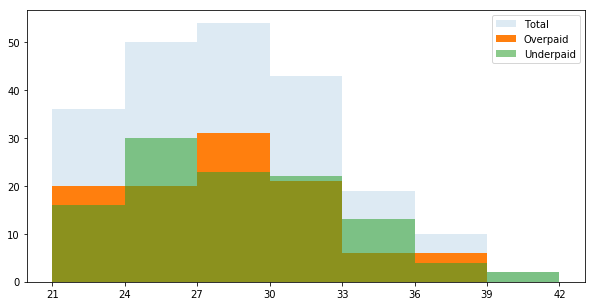

In [32]:
#Distribution of ages for Overpaid and Underpaid Players
plt.figure(figsize=(10,5))
bins = [21, 24, 27, 30, 33, 36, 39, 42]
plt.hist(stats[stats['Pay Status'].isnull() == False]['Age'], label = 'Total', bins = bins, alpha = 0.15)
plt.hist(stats[stats['Pay Status'] == 'Overpaid']['Age'], label = 'Overpaid', bins = bins, alpha = 1)
plt.hist(stats[stats['Pay Status'] == 'Underpaid']['Age'], label = 'Underpaid', bins = bins, alpha = 0.55)
plt.legend()
plt.xticks(bins)
plt.show()

In [33]:
stats[stats['Pay Status'] == 'Overpaid']['Pos'].value_counts()

Guard      43
Forward    41
Center     20
Name: Pos, dtype: int64

In [34]:
stats[stats['Pay Status'] == 'Underpaid']['Pos'].value_counts()

Guard      44
Forward    40
Center     26
Name: Pos, dtype: int64

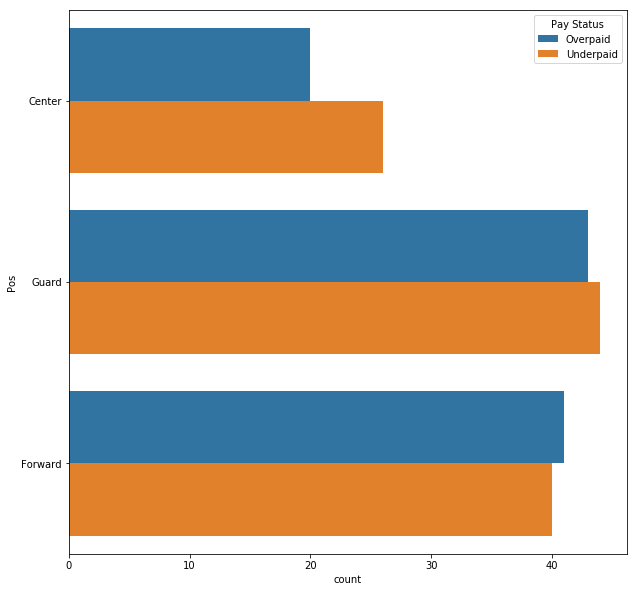

In [35]:
#Count of Positons for reach respective Pay Status
plt.figure(figsize=(10,10))
sns.countplot(y = 'Pos', hue = 'Pay Status', data = stats)

# Teams

In [36]:
stats.replace('CHO', 'CHA', inplace = True)

In [37]:
#Average Residuals
stats.groupby('New Team').mean()['Residuals'].sort_values()

New Team
GSW   -2.225546
IND   -1.678950
NOP   -1.386052
TOR   -1.243317
CLE   -1.171415
HOU   -0.866727
OKC   -0.782160
SAS   -0.696485
UTA   -0.444811
LAC   -0.420072
LAL   -0.325604
MIA   -0.209086
ATL   -0.082822
BRK    0.051391
MIL    0.229439
DAL    0.262751
WAS    0.281757
BOS    0.423556
DET    0.576062
CHI    0.631658
MIN    0.675239
DEN    0.705580
MEM    0.835159
PHO    0.847964
ORL    0.868507
CHA    0.912552
NYK    1.239126
SAC    1.844258
PHI    1.851231
POR    2.045307
Name: Residuals, dtype: float64

In [38]:
#Average Residuals for Inaccurately Paid Players 
stats[stats['Pay Status'].isnull() == False].groupby('New Team').mean()['Residuals'].sort_values()

New Team
OKC   -4.010549
CLE   -3.657048
GSW   -3.398960
IND   -2.877264
TOR   -2.459260
HOU   -2.323193
SAS   -2.056516
NOP   -1.553879
MIA   -1.052369
LAL   -0.788569
LAC   -0.352124
UTA    0.068076
BRK    0.095956
BOS    0.252226
ATL    0.318927
DEN    0.593738
DAL    0.650315
MIL    0.679847
MIN    0.746364
WAS    0.892862
CHI    1.580377
NYK    2.168058
DET    2.172386
PHO    2.380539
ORL    2.670849
MEM    2.931475
SAC    3.435635
PHI    3.793720
CHA    3.855906
POR    5.521920
Name: Residuals, dtype: float64

In [39]:
Teams = pd.DataFrame(index = stats['New Team'].unique().tolist())
for i in Teams.index.tolist():
    try:
        Teams.loc[i, 'Total'] = stats['New Team'].value_counts()[i]
    except:
        pass
    try:
        Teams.loc[i, 'Total inaccurate pays'] = stats[stats['Pay Status'].isnull() == False]['New Team'].value_counts()[i]
    except:
        pass
    try:
        Teams.loc[i, 'Overpaid'] = stats[stats['Pay Status'] == 'Overpaid']['New Team'].value_counts()[i]
    except:
        pass
    try:
        Teams.loc[i, 'Overpaid Residual mean'] = stats[stats['Pay Status'] == 'Overpaid'].groupby('New Team').mean()['Residuals'][i]
    except:
        pass
    try:
        Teams.loc[i, 'Underpaid'] = stats[stats['Pay Status'] == 'Underpaid']['New Team'].value_counts()[i]
    except:
        pass
    try:
        Teams.loc[i, 'Underpaid Residual mean'] = stats[stats['Pay Status'] == 'Underpaid'].groupby('New Team').mean()['Residuals'][i]
    except:
        pass
Teams.fillna(0, inplace = True)
Teams['Overpaid Ratio'] = Teams['Overpaid']/Teams['Total']
Teams['Underpaid Ratio'] = Teams['Underpaid']/Teams['Total']
Teams.reset_index(inplace = True)
Teams.rename({'index' : 'Teams'}, axis = 1, inplace = True)
Teams

,Teams,Total,Total inaccurate pays,Overpaid,Overpaid Residual mean,Underpaid,Underpaid Residual mean,Overpaid Ratio,Underpaid Ratio
0,NYK,19.0,8.0,5.0,6.065820,3.0,-4.328211,0.263158,0.157895
1,NOP,19.0,13.0,4.0,6.286690,9.0,-5.038576,0.210526,0.473684
2,LAL,29.0,14.0,5.0,5.423780,9.0,-4.239875,0.172414,0.310345
3,CHI,13.0,8.0,4.0,6.854271,4.0,-3.693517,0.307692,0.307692
4,CHA,11.0,3.0,2.0,8.739889,1.0,-5.912059,0.181818,0.090909
5,PHI,14.0,8.0,6.0,6.635208,2.0,-4.730745,0.428571,0.142857
6,MIN,14.0,7.0,3.0,7.189678,4.0,-4.086122,0.214286,0.285714
7,MIL,22.0,8.0,4.0,6.307138,4.0,-4.947444,0.181818,0.181818
8,SAC,17.0,10.0,9.0,4.418234,1.0,-5.407754,0.529412,0.058824
9,BRK,21.0,8.0,3.0,6.196343,5.0,-3.564276,0.142857,0.238095


In [40]:
Teams.sort_values('Underpaid Ratio').reset_index(drop = True)

,Teams,Total,Total inaccurate pays,Overpaid,Overpaid Residual mean,Underpaid,Underpaid Residual mean,Overpaid Ratio,Underpaid Ratio
0,POR,12.0,4.0,4.0,5.521920,0.0,0.000000,0.333333,0.000000
1,SAC,17.0,10.0,9.0,4.418234,1.0,-5.407754,0.529412,0.058824
2,DET,14.0,4.0,3.0,3.894785,1.0,-2.994811,0.214286,0.071429
3,OKC,12.0,1.0,0.0,0.000000,1.0,-4.010549,0.000000,0.083333
4,CHA,11.0,3.0,2.0,8.739889,1.0,-5.912059,0.181818,0.090909
5,PHO,9.0,4.0,3.0,4.300952,1.0,-3.380699,0.333333,0.111111
6,ORL,17.0,7.0,5.0,5.501488,2.0,-4.405749,0.294118,0.117647
7,CLE,14.0,3.0,1.0,3.640951,2.0,-7.306048,0.071429,0.142857
8,PHI,14.0,8.0,6.0,6.635208,2.0,-4.730745,0.428571,0.142857
9,MEM,13.0,6.0,4.0,6.482100,2.0,-4.169773,0.307692,0.153846


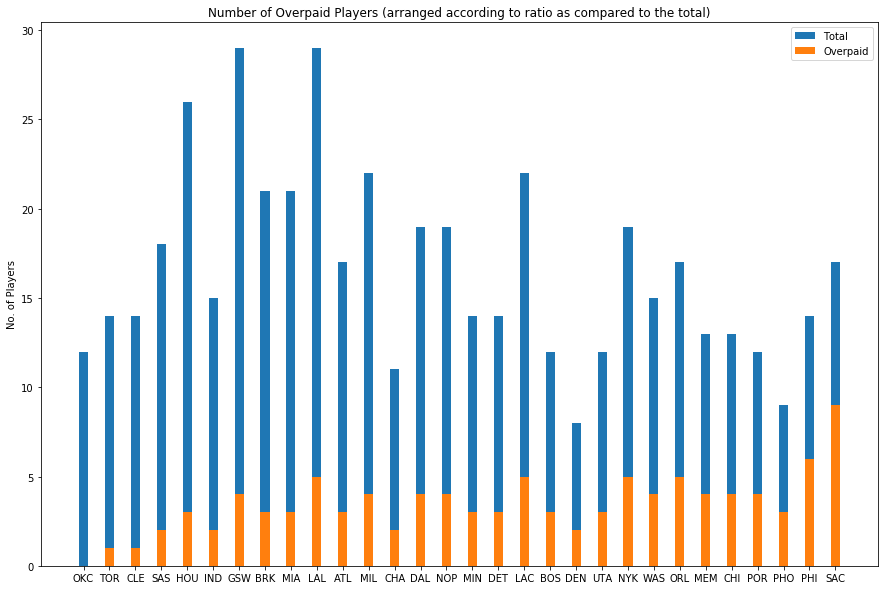

In [41]:
plt.figure(figsize=(15,10))
p1 = plt.bar(np.arange(30), Teams.sort_values('Overpaid Ratio')['Total'], 0.35)
p2 = plt.bar(np.arange(30), Teams.sort_values('Overpaid Ratio')['Overpaid'], 0.35)

plt.ylabel('No. of Players')
plt.title('Number of Overpaid Players (arranged according to ratio as compared to the total)')
plt.xticks(np.arange(30), Teams.sort_values('Overpaid Ratio')['Teams'].tolist())
plt.legend((p1[0], p2[0]), ('Total', 'Overpaid'))
plt.show()

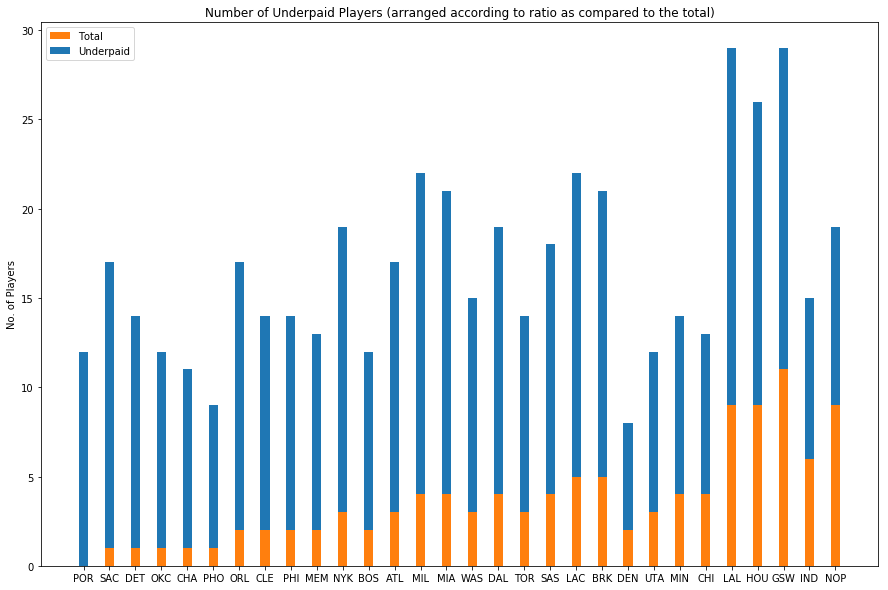

In [42]:
plt.figure(figsize=(15,10))
p2 = plt.bar(np.arange(30), Teams.sort_values('Underpaid Ratio')['Total'], 0.35)
p1 = plt.bar(np.arange(30), Teams.sort_values('Underpaid Ratio')['Underpaid'], 0.35)

plt.ylabel('No. of Players')
plt.title('Number of Underpaid Players (arranged according to ratio as compared to the total)')
plt.xticks(np.arange(30), Teams.sort_values('Underpaid Ratio')['Teams'].tolist())
plt.legend((p1[0], p2[0]), ('Total', 'Underpaid'))
plt.show()

In [43]:
#Average Residuals of Overpaid Players
Teams[['Teams', 'Overpaid Residual mean']].sort_values('Overpaid Residual mean', ascending = False).reset_index(drop = True)

,Teams,Overpaid Residual mean
0,CHA,8.739889
1,MIN,7.189678
2,CHI,6.854271
3,PHI,6.635208
4,MEM,6.482100
5,DAL,6.428835
6,MIL,6.307138
7,NOP,6.286690
8,BRK,6.196343
9,NYK,6.065820


In [44]:
#Average Residuals of Underpaid Players
Teams[['Teams', 'Underpaid Residual mean']].sort_values('Underpaid Residual mean').reset_index(drop = True)

,Teams,Underpaid Residual mean
0,CLE,-7.306048
1,GSW,-6.763644
2,CHA,-5.912059
3,SAC,-5.407754
4,DAL,-5.128205
5,NOP,-5.038576
6,TOR,-5.003063
7,MIA,-4.998510
8,BOS,-4.963078
9,MIL,-4.947444
